# Assignment #3
## Yelp time series analysis

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
path = 'D:/Yelp/'
df = pd.read_csv(path +'Lab 2 Output.csv')

In [3]:
df.dtypes

Unnamed: 0         int64
review_id         object
user_id           object
business_id       object
stars_x            int64
date              object
business_name     object
neighborhood      object
postal_code      float64
latitude         float64
longitude        float64
is_open            int64
categories        object
name              object
review_count       int64
yelping_since     object
average_stars    float64
rating            object
rating2           object
rating3           object
dtype: object

In [4]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars_x,date,business_name,neighborhood,postal_code,latitude,longitude,is_open,categories,name,review_count,yelping_since,average_stars,rating,rating2,rating3
0,0,AeesDpJuuEK3JbHQw5R6zg,pS03ZJBfVmjFOEDweTViOw,YDeN4OHayfKocEo7Tz4jMg,4,2013-09-24,La Tagliatella EpiCentre,Uptown,28202.0,35.225324,-80.842187,0,Pizza;Restaurants;Italian,Curtis,98,2011-03-10,3.94,Good,OK,Fine
1,1,JG3_Si10GgBvaOm6KhJnfQ,pS03ZJBfVmjFOEDweTViOw,npWIa3dIPEV1MTaZNq6AUA,5,2015-06-23,Firebirds Wood Fired Grill,NaN,28277.0,35.062055,-80.815844,1,American (New);Steakhouses;Wine Bars;American ...,Curtis,98,2011-03-10,3.94,Good,Great,Fine
2,2,10CWHGeBk218Zod5zMqLoQ,pS03ZJBfVmjFOEDweTViOw,U3kygJOTlTQFlfaZS7sQjA,4,2015-07-06,JJ's Red Hots,Dilworth,28203.0,35.199798,-80.842295,1,American (Traditional);Hot Dogs;Vegetarian;Cat...,Curtis,98,2011-03-10,3.94,Good,OK,Fine
3,3,31JojRDGP26z9qfV9sfPFg,pS03ZJBfVmjFOEDweTViOw,6Pbrq60mA56WQU7SENbG0g,4,2015-07-06,Brooks Sandwich House,NoDa,28205.0,35.245284,-80.811510,1,Sandwiches;Restaurants;Burgers,Curtis,98,2011-03-10,3.94,Good,OK,Fine
4,4,H_W-fV99rKslA-4nxQtCEA,pS03ZJBfVmjFOEDweTViOw,-I27yVw2x_-31_OOMSH02w,5,2013-09-24,Local Loaf,First Ward,28202.0,35.227759,-80.838199,1,Delis;Restaurants;American (Traditional);Food;...,Curtis,98,2011-03-10,3.94,Good,Great,Fine


In [5]:
df['date'] = pd.to_datetime(df.date)

## Trend in yelping

In [6]:
ddf = df.set_index('date')

In [7]:
ddf['Year'] = ddf.index.year
ddf['Month'] = ddf.index.month
ddf['Weekday Name'] = ddf.index.weekday_name

### First check to see the trend of yelp activity

First i wanted to check the number of reviews submitted to see how active reviewers are

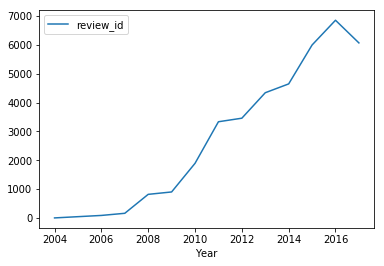

In [8]:
df_year = ddf.groupby(['Year']).agg({'review_id':'count'})
df_year.plot()

It appears that use of the site is growing and more reviews are coming in each year
next i wanted to see if reviews happened more frequently at during a certain time of year

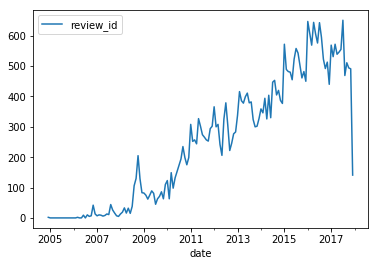

In [9]:
M = ddf.groupby(pd.Grouper(freq="M")).agg({'review_id':'count'})
M.plot()

When looking at the data it makes me wonder if there is a seasonality component to the number of reviews that are made by yelpers in charlotte
## Trend and seasonal analysis

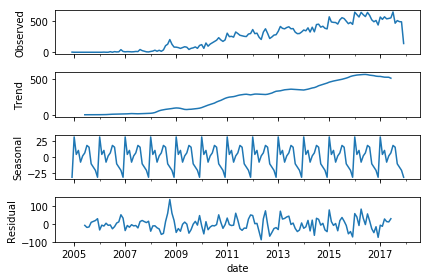

In [10]:
decomposition = sm.tsa.seasonal_decompose (M, model = 'additive')
fig = decomposition.plot()

From the previous charts it was already pretty clear that the amount of reviews submitted was trending upward and this confirms that assumtion, additionally it appears that there is a slight seasonal compent to our data as well. Both at the end of each year reviews drop dramatically but seem to spike again right in what appears to be febuary of each year. maybe people like leaving more reviews around valentines day?

# Certain Business : Amélie's French Bakery & Café

Amélie's is a 24 hr bakery located between downtown charlotte and the university of north carolina at charlotte. it is a very popular place with students and has gotten more reviews that any other business in this data set. lets break down a few aspects of these reveiws and see if we can gain any information from them

In [12]:
ddf.business_name.value_counts()

Amélie's French Bakery & Café            348
Midwood Smokehouse                       277
Viva Chicken                             251
The Cowfish Sushi Burger Bar             236
Bad Daddy's Burger Bar                   224
Cantina 1511                             197
Cabo Fish Taco                           191
Pinky's Westside Grill                   187
Tupelo Honey                             185
Terrace Restaurants                      178
Panera Bread                             174
Soul Gastrolounge                        172
Duckworth's Grill & Taphouse             167
Sabor Latin Street Grill                 158
Firebirds Wood Fired Grill               155
Chick-fil-A                              152
Mellow Mushroom                          150
Hickory Tavern                           143
Chipotle Mexican Grill                   139
Ru San's                                 129
Zada Jane's Corner Cafe                  129
Zoës Kitchen                             129
McDonald's

In [13]:
dfA = ddf[ddf.business_name == "Amélie's French Bakery & Café"]

Now that we have created a dataset isolating Amélie's French Bakery & Café lets see if there are any patterns in the data similar to what we saw in the main dataset.

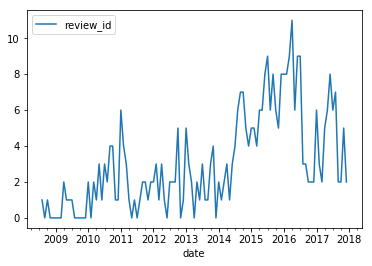

In [16]:
AM = dfA.groupby(pd.Grouper(freq="M")).agg({'review_id':'count'})
AM.plot()

It appears that Amélie's French Bakery & Café started getting more attention mid 2014 and really spiked in 2016 before settling down, there is less data to look at but lets see if we can determine some time series compents for these reviews.

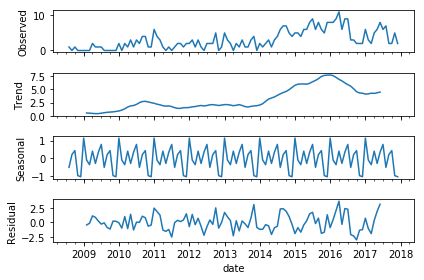

In [17]:
decomposition = sm.tsa.seasonal_decompose (AM, model = 'additive')
fig = decomposition.plot()

as we can see in these outputs there is a positive trend in the number of reviews for Amélie's that only begins to dropoff at 2016 like we mentioned before and while there does appear to be a seasonal compent, it looks like fall and spring are the highest time for reviews in this case which makes sense when you consider that fall and spring are times when students are in school where the later part of the year has long break periods so less people may be going to the bakery to review it.
## Good v. Bad reviews
We have seen the trend in review volume but lets look at how people feel about the bakery and if there is any pattern that have developed there.


In [15]:
dfAG = dfA[dfA.rating == 'Good']
dfAB = dfA[dfA.rating == 'Bad']

(-0.2, 10)

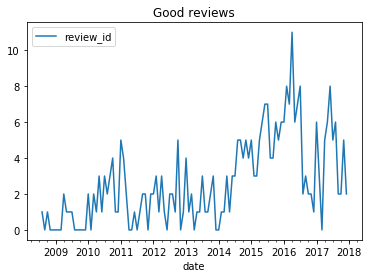

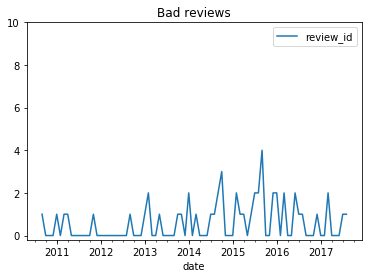

In [32]:
AMG = dfAG.groupby(pd.Grouper(freq="M")).agg({'review_id':'count'})
AMB = dfAB.groupby(pd.Grouper(freq="M")).agg({'review_id':'count'})


ax1= AMG.plot()
ax1.set_title('Good reviews')
ax2 = AMB.plot()
ax2.set_title('Bad reviews')
ax2.set_ylim(top=10)

Above it appears that the patterns in good and bad reviews mostly line up with the volume of reviews an interesting
to note here is that after a spike of bad reviews it appears that bad reviews drop drastically in following months. This
could indicate that the bakery is responding to bad reviews and fixing issues that occur.

## Do review types have Seasonality or a Trend?

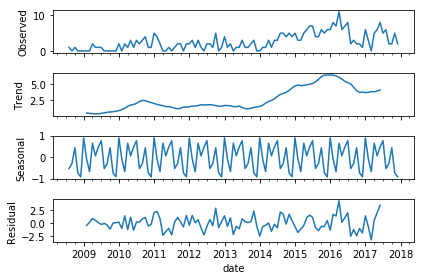

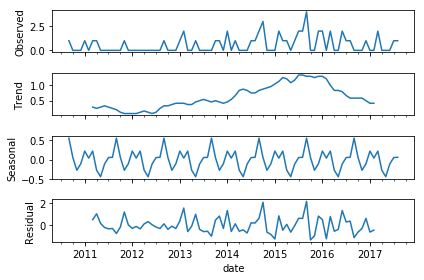

In [30]:
ax1 = sm.tsa.seasonal_decompose (AMG, model = 'additive').plot()
ax2 = sm.tsa.seasonal_decompose (AMB, model = 'additive').plot()

Judging from the outputs above i would say that the seasonal influence for good and bad reviews is inline with what we would
expect cosidering the output for the overall volume of reviews there is less shown for summer and winter because there 
are fewer reviews at this time. As far as trend is concerned it looks similar, however a major distinction here is that 
near the end where all three trends see a dropoff, the overall and good reviews begin to trend upward and the bad reviews
are still trending downward. This bodes well for the business and if this continues business should improve.